In [4]:
import spectral as sp
header = "C:/Users/luker/Documents/GitHub/HyperCam_Retrievals/Test_Data/2023_TestFlightData/20230612_Flight/WhittlesleyAOI/raw/Mosaic.radiance.hdr"
radiance = "C:/Users/luker/Documents/GitHub/HyperCam_Retrievals/Test_Data/2023_TestFlightData/20230612_Flight/WhittlesleyAOI/raw/Mosaic.radiance.sc"
image = sp.envi.open(header, radiance)
wvl = image.bands.centers
rows, cols, bands = image.nrows, image.ncols, image.nbands
meta = image.metadata

img = image.load()

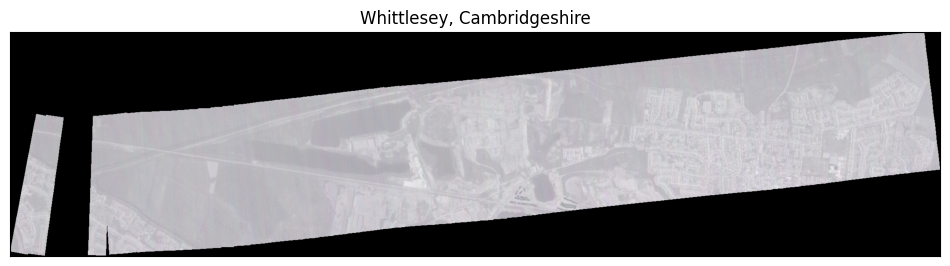

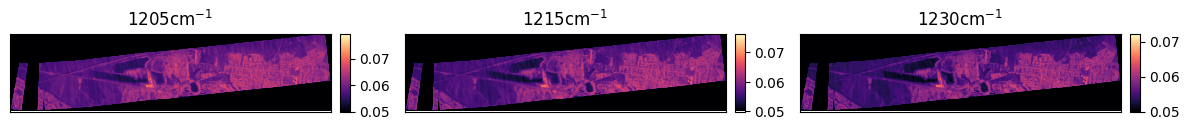

In [176]:
import matplotlib.pyplot as plt
import earthpy.plot as ep
import numpy as np

def scale_min_max(array):
    return (array - np.nanmin(array)) / (np.nanmax(array) - np.nanmin(array))

# Select the wavenumbers to visualise
RGB_sel = np.array([1205, 1215, 1230])


ind = [abs(wvl - i).argmin() for i in RGB_sel]
vis_img = image[:,:,ind]
rgb_img = np.array([vis_img[:,:,0], vis_img[:,:,1], vis_img[:,:,2]])
rgb_norm = np.array([scale_min_max(i) for i in rgb_img])

fig, ax = plt.subplots(figsize=(12,100))

ep.plot_rgb(rgb_norm, rgb =(1,0,2), ax=ax, title="Whittlesey, Cambridgeshire")
plt.show()

ep.plot_bands(rgb_img, ax=ax,vmin=0.05, cmap = 'magma', title = [str(str(i)+'cm$^{-1}$') for i in RGB_sel])
plt.show()

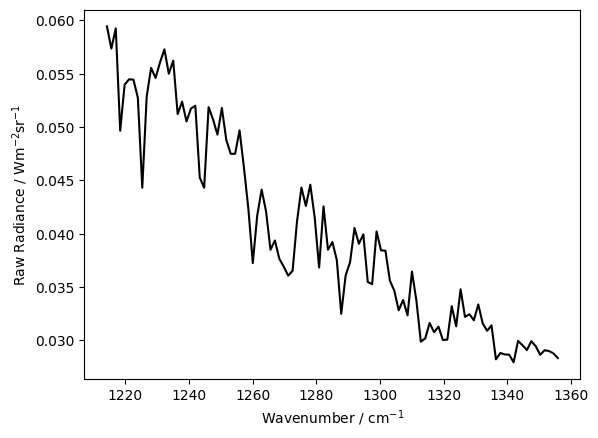

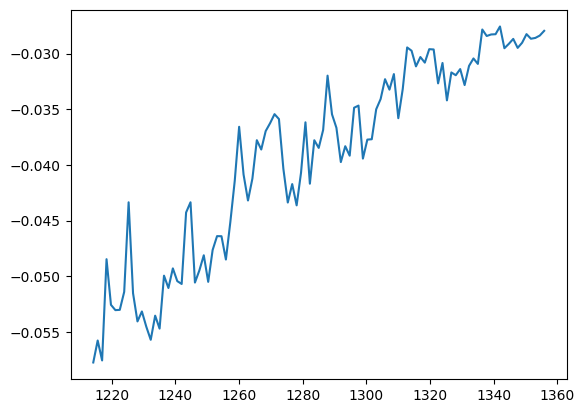

In [177]:
# Select pixel no. to examine
pixel_no = [200, 500]

arr = image[pixel_no[0], pixel_no[1], :][0][0]

plt.plot(wvl, arr, 'k')
plt.xlabel('Wavenumber / cm$^{-1}$')
plt.ylabel('Raw Radiance / Wm$^{-2}$sr$^{-1}$')

plt.savefig('Figures/ExampleRadiance.pdf')

plt.show()

plt.plot(wvl, -np.log(1+arr))

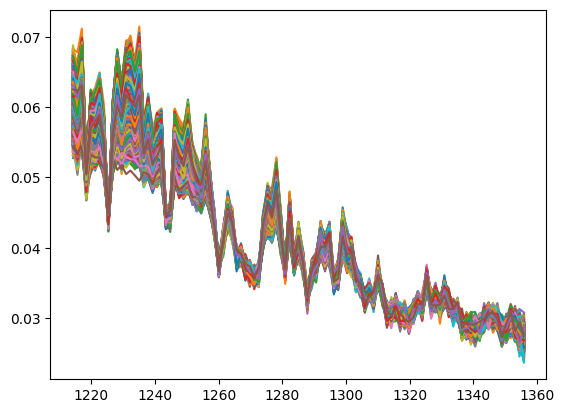

In [135]:
# Examine entire row or column

for i in range(image.shape[1]):
    arr = image[pixel_no[0], i, :][0][0]
    if sum(arr) != 0:
        plt.plot(wvl, arr)

In [151]:
img_reshape = img.reshape(-1, img.shape[-1])
# return to img form
#img_reshape.reshape(image.shape)


In [154]:
img_reshape

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)